# Following https://www.dzialowski.eu/football-data-visualisations/ 's great tutorial.

In [1]:
import pandas as pd
import numpy as np
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns
import matplotlib.patches as mpatches
pd.set_option('display.max_columns', None)
from highlight_text import fig_text
#Set general use colors
text_color = 'w'

In [2]:
i=np.arange(1396,1401)
i

array([1396, 1397, 1398, 1399, 1400])

In [3]:
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r',encoding='utf8')
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')
    for k in i:
        data_txt=data_txt.replace('\n</td></tr><tr><td class="line-number" value="'+ str(k) +'"></td><td class="line-content">',' ')
    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

In [4]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [5]:
match_html_path = 'matches/ArgFra.html'
json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

In [6]:
players_df

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,102248,23,Emiliano Martínez,GK,195,88,30,True,False,home,"{'totalSaves': {'101': 1.0, '139': 1.0}, 'parr...",NaN,NaN,NaN,NaN,NaN,NaN,346
1,303728,26,Nahuel Molina,DR,175,70,24,True,False,home,"{'possession': {'3': 1.0, '7': 1.0, '11': 1.0,...",316883.0,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",106.0,NaN,NaN,NaN,346
2,75691,19,Nicolás Otamendi,DC,183,81,34,True,False,home,"{'possession': {'0': 2.0, '1': 3.0, '3': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
3,323663,13,Cristian Romero,DC,185,79,24,True,False,home,"{'possession': {'0': 2.0, '1': 2.0, '3': 3.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
4,83809,3,Nicolás Tagliafico,DL,172,66,30,True,False,home,"{'possession': {'0': 1.0, '4': 1.0, '11': 2.0,...",114863.0,"{'value': 15, 'displayName': 'PreGame'}",137.0,NaN,NaN,NaN,346
5,125547,7,Rodrigo De Paul,MC,180,70,28,True,False,home,"{'possession': {'0': 1.0, '2': 1.0, '3': 1.0, ...",93700.0,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",117.0,NaN,NaN,NaN,346
6,345319,20,Alexis Mac Allister,MC,176,69,23,True,False,home,"{'possession': {'2': 1.0, '3': 2.0, '4': 2.0, ...",121456.0,"{'value': 15, 'displayName': 'PreGame'}",132.0,NaN,NaN,NaN,346
7,369430,24,Enzo Fernández,MC,178,76,21,True,False,home,"{'possession': {'3': 1.0, '4': 1.0, '7': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
8,11119,10,Lionel Messi,FWR,170,72,35,True,False,home,"{'possession': {'2': 2.0, '4': 1.0, '7': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,346
9,365409,9,Julián Álvarez,FW,170,71,22,True,False,home,"{'possession': {'4': 1.0, '7': 1.0, '13': 2.0,...",299344.0,"{'value': 4, 'displayName': 'SecondPeriodOfExt...",118.0,NaN,NaN,NaN,346


In [7]:
teams_dict

{346: 'Argentina', 341: 'France'}

In [8]:
def get_passes_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] == 'Pass']
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_passes

In [9]:
passes_df = get_passes_df(events_dict)
passes_df

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType
2,2.492350e+09,49.8,50.0,37.0,42.5,341,80241.0,353423.0,Pass,Successful
3,2.492350e+09,41.2,43.7,77.9,100.0,341,353423.0,303728.0,Pass,Unsuccessful
4,2.492350e+09,21.4,0.0,29.3,4.0,346,303728.0,125547.0,Pass,Successful
7,2.492350e+09,32.7,14.6,19.4,27.5,346,125547.0,323663.0,Pass,Successful
8,2.492350e+09,19.6,29.3,18.9,58.1,346,323663.0,75691.0,Pass,Successful
...,...,...,...,...,...,...,...,...,...,...
2071,2.492356e+09,4.3,43.0,57.2,16.4,341,25604.0,303729.0,Pass,Unsuccessful
2072,2.492356e+09,42.9,81.0,52.0,67.8,346,303729.0,353423.0,Pass,Unsuccessful
2073,2.492356e+09,48.6,33.2,63.8,30.5,341,353423.0,93700.0,Pass,Unsuccessful
2075,2.492356e+09,41.6,67.6,48.4,71.5,346,93700.0,369430.0,Pass,Successful


In [10]:
players_df['Include']=False

In [11]:
def get_passes_between_df(team_id, passes_df, players_df):
    # filter for only team
    passes_df = passes_df[passes_df["teamId"] == team_id]
    # Get the players who played the most minutes from each team ( to filter early subs) by getting the index of these players
    ind=[]
    i=0
    for i in range(len(players_df)):
        if not pd.isna(players_df.iloc[i].isFirstEleven) and (pd.isna(players_df.iloc[i].subbedOutPeriod) or players_df.iloc[i].subbedOutExpandedMinute >= 45.0):
            ind.append(i)
        if players_df.iloc[i].subbedInExpandedMinute <45:
            ind.append(i)
    # Get the players Ids 
    ids=[]
    for v in ind:
        ids.append(players_df['playerId'].iloc[v])
    players_df['Include']=players_df['playerId'].apply(lambda x: True if x in ids else False)
        

    # add column with players who have played at least 45 minutes (to filter out early subs)
    passes_df = passes_df.merge(players_df[["playerId", "Include"]], on='playerId', how='left')
    # filter on those who played the most minutes of their teams
    passes_df = passes_df[passes_df['Include'] == True]

    # calculate mean positions for players
    average_locs_and_count_df = (passes_df.groupby('playerId')
                                 .agg({'x': ['mean'], 'y': ['mean', 'count']}))
    average_locs_and_count_df.columns = ['x', 'y', 'count']
    average_locs_and_count_df = average_locs_and_count_df.merge(players_df[['playerId', 'name', 'shirtNo', 'position']],
                                                                on='playerId', how='left')
    average_locs_and_count_df = average_locs_and_count_df.set_index('playerId')

    # calculate the number of passes between each position (using min/ max so we get passes both ways)
    passes_player_ids_df = passes_df.loc[:, ['id', 'playerId', 'receiver', 'teamId']]
    passes_player_ids_df['pos_max'] = (passes_player_ids_df[['playerId', 'receiver']].max(axis='columns'))
    passes_player_ids_df['pos_min'] = (passes_player_ids_df[['playerId', 'receiver']].min(axis='columns'))

    # get passes between each player
    passes_between_df = passes_player_ids_df.groupby(['pos_min', 'pos_max']).id.count().reset_index()
    passes_between_df.rename({'id': 'pass_count'}, axis='columns', inplace=True)

    # add on the location of each player so we have the start and end positions of the lines
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_min', right_index=True)
    passes_between_df = passes_between_df.merge(average_locs_and_count_df, left_on='pos_max', right_index=True,
                                                suffixes=['', '_end'])
    return passes_between_df, average_locs_and_count_df



In [12]:
home_team_id = list(teams_dict.keys())[0]  # selected home team
home_passes_between_df, home_average_locs_and_count_df = get_passes_between_df(home_team_id, passes_df, players_df)

In [13]:
home_average_locs_and_count_df

,x,y,count,name,shirtNo,position
playerId,,,,,,
11119.0,67.481356,38.579661,59,Lionel Messi,10,FWR
23110.0,65.287097,83.848387,31,Ángel Di María,11,FWL
75691.0,34.228378,69.989189,74,Nicolás Otamendi,19,DC
83809.0,48.435849,90.279245,53,Nicolás Tagliafico,3,DL
102248.0,11.193750,46.300000,32,Emiliano Martínez,23,GK
125547.0,49.947826,25.626087,69,Rodrigo De Paul,7,MC
303728.0,48.490566,11.264151,53,Nahuel Molina,26,DR
323663.0,30.691429,33.758571,70,Cristian Romero,13,DC
345319.0,56.936538,65.236538,52,Alexis Mac Allister,20,MC


In [14]:
away_team_id = list(teams_dict.keys())[1]  # selected home team
away_passes_between_df, away_average_locs_and_count_df = get_passes_between_df(away_team_id, passes_df, players_df)

In [15]:
away_average_locs_and_count_df

,x,y,count,name,shirtNo,position
playerId,,,,,,
25604.0,10.873171,52.007317,41,Hugo Lloris,1,GK
80241.0,59.175000,50.321875,32,Antoine Griezmann,7,AMC
93206.0,38.626562,35.928125,64,Raphaël Varane,4,DC
116609.0,52.500000,67.522642,53,Adrien Rabiot,14,DMC
296322.0,58.450000,78.605000,20,Marcus Thuram,26,Sub
300713.0,68.704000,78.032000,25,Kylian Mbappé,10,AML
301019.0,43.255882,13.160294,68,Jules Koundé,5,DR
303115.0,53.083673,92.126531,49,Theo Hernández,22,DL
327721.0,38.153030,67.787879,66,Dayot Upamecano,18,DC


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
from mplsoccer import Pitch, FontManager

In [17]:
def pass_network_visualization(ax, passes_between_df, average_locs_and_count_df, flipped=False):
    MAX_LINE_WIDTH = 10
    MAX_MARKER_SIZE = 3000
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max() *
                                  MAX_LINE_WIDTH)
    average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']
                                                / average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE)

    MIN_TRANSPARENCY = 0.3
    color = np.array(to_rgba('#507293'))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
    pitch.draw(ax=ax)

    if flipped:
        passes_between_df['x'] = pitch.dim.right - passes_between_df['x']
        passes_between_df['y'] = pitch.dim.right - passes_between_df['y']
        passes_between_df['x_end'] = pitch.dim.right - passes_between_df['x_end']
        passes_between_df['y_end'] = pitch.dim.right - passes_between_df['y_end']
        average_locs_and_count_df['x'] = pitch.dim.right - average_locs_and_count_df['x']
        average_locs_and_count_df['y'] = pitch.dim.right - average_locs_and_count_df['y']

    pass_lines = pitch.lines(passes_between_df.x, passes_between_df.y,
                             passes_between_df.x_end, passes_between_df.y_end, lw=passes_between_df.width,
                             color=color, zorder=1, ax=ax)
    pass_nodes = pitch.scatter(average_locs_and_count_df.x, average_locs_and_count_df.y,
                               s=250, marker='o',
                               color='#FEFEFC', edgecolors='#FEFEFC', linewidth=1, alpha=1, ax=ax)
    for index, row in average_locs_and_count_df.iterrows():
        num = row["shirtNo"]
        #player_name = player_name[-1].upper()
        pitch.annotate(num, xy=(row.x, row.y), c='#0D182E', va='center',
                       ha='center', size=10, ax=ax)

    return pitch

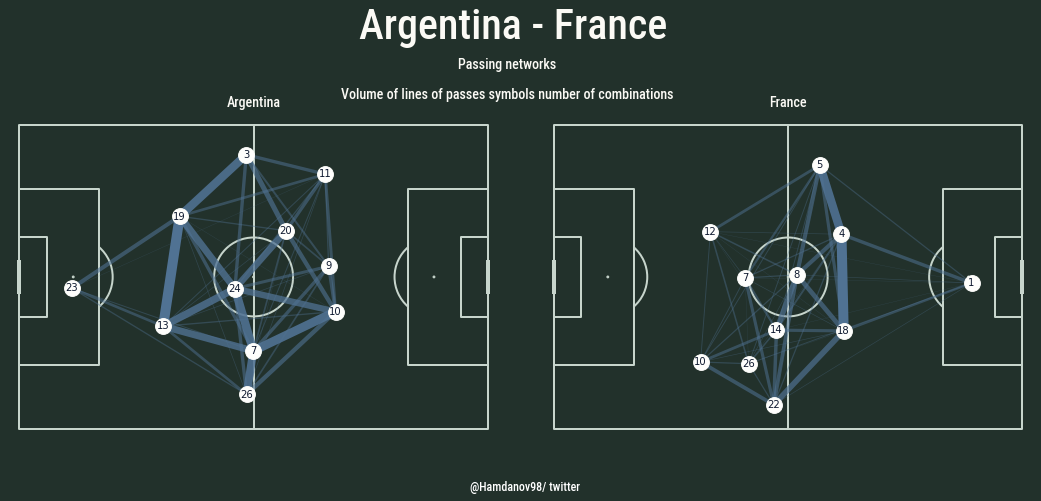

In [18]:
# create plot
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
axes = axes.flat
plt.tight_layout()
fig.set_facecolor("#22312b")

# plot variables
main_color = '#FBFAF5'
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "RobotoCondensed-Medium.ttf?raw=true"))

# home team viz
pass_network_visualization(axes[0], home_passes_between_df, home_average_locs_and_count_df)
axes[0].set_title(teams_dict[home_team_id], color=main_color, fontsize=14, fontproperties=font_bold.prop)

# away team viz
pass_network_visualization(axes[1], away_passes_between_df, away_average_locs_and_count_df, flipped=True)
axes[1].set_title(teams_dict[away_team_id], color=main_color, fontsize=14, fontproperties=font_bold.prop)

plt.suptitle(f"{teams_dict[home_team_id]} - {teams_dict[away_team_id]}", color=main_color, fontsize=42, fontproperties=font_bold.prop)
subtitle = "Passing networks"
explaining="Volume of lines of passes symbols number of combinations"
plt.text(-10, 120, subtitle, horizontalalignment='center', verticalalignment='center', color=main_color, fontsize=14, fontproperties=font_bold.prop)
plt.text(-10, 110, explaining, horizontalalignment='center', verticalalignment='center', color=main_color, fontsize=14, fontproperties=font_bold.prop)

fig.text(.46,.14,f'@Hamdanov98/ twitter',fontstyle='italic',fontproperties=font_bold.prop,fontsize=12,color=text_color)
plt.savefig('pics/ArgentinaFrance.png', bbox_inches='tight')
plt.show()